In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

ValueError: mount failed

In [ ]:
import pandas as pd
# Define directories
df_dir = '/content/drive/My Drive/Maternal_Health_Risk/Maternal_Health_Risk_Data_Set.csv'

# Load your maternal health dataset
df = pd.read_csv(df_dir)
print(df.head())
print(df.info())


   Age  SystolicBP  DiastolicBP    BS  BodyTemp  HeartRate  RiskLevel
0   25         130           80  15.0      98.0         86  high risk
1   35         140           90  13.0      98.0         70  high risk
2   29          90           70   8.0     100.0         80  high risk
3   30         140           85   7.0      98.0         70  high risk
4   35         120           60   6.1      98.0         76   low risk
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB
None


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle

In [ ]:
from imblearn.over_sampling import SMOTE
import pandas as pd

# Assuming your target column is named 'RiskLevel'
X = df.drop('RiskLevel', axis=1)  # Features
y = df['RiskLevel']  # Target

# Define SMOTE with a strategy to increase the dataset size
target_samples = 100000
sampling_strategy = {label: int((target_samples / len(y)) * sum(y == label)) for label in y.unique()}

# Initialize SMOTE with the new sampling strategy
smote = SMOTE(sampling_strategy=sampling_strategy, random_state=42)

# Generate synthetic samples
X_resampled, y_resampled = smote.fit_resample(X, y)

# Combine the resampled features and target into a new DataFrame
df_resampled = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.Series(y_resampled, name='RiskLevel')], axis=1)

# Shuffle the new dataset
df_resampled = df_resampled.sample(frac=1, random_state=42).reset_index(drop=True)

# Check the size of the new dataset
print(f'Original dataset size: {df.shape}')
print(f'Resampled dataset size: {df_resampled.shape}')

# Save the new dataset to a CSV file
df_resampled.to_csv('/content/drive/My Drive/Maternal_Health_Risk/Maternal_health_risk_resampled_updated.csv', index=False)

Original dataset size: (1014, 7)
Resampled dataset size: (99999, 7)


In [ ]:
# Load your maternal health dataset
df_resampled = pd.read_csv('/content/drive/My Drive/Maternal_Health_Risk/Maternal_health_risk_resampled_updated.csv')
print(df_resampled.head())
print(df_resampled.info())

   Age  SystolicBP  DiastolicBP         BS  BodyTemp  HeartRate  RiskLevel
0   14          90           65   7.000000     101.0         70  high risk
1   19         120           80   7.000000      98.0         70   mid risk
2   49         129           80  14.773090      98.0         86  high risk
3   16          93           66   6.900000      98.0         77   mid risk
4   21         120           80   7.318656      98.0         77   low risk
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          99999 non-null  int64  
 1   SystolicBP   99999 non-null  int64  
 2   DiastolicBP  99999 non-null  int64  
 3   BS           99999 non-null  float64
 4   BodyTemp     99999 non-null  float64
 5   HeartRate    99999 non-null  int64  
 6   RiskLevel    99999 non-null  object 
dtypes: float64(2), int64(4), object(1)
memory usage: 5.3+ MB
No

In [ ]:
X_resampled = df_resampled.drop('RiskLevel', axis=1)
y_resampled = df_resampled['RiskLevel']

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_resampled = le.fit_transform(y_resampled)

# Splitting the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from scipy import stats
from sklearn.preprocessing import LabelEncoder

# Step 2: Remove outliers using Z-Score Method
z_scores = np.abs(stats.zscore(df_resampled.select_dtypes(include=[np.number])))
df_no_outliers = df_resampled[(z_scores < 3).all(axis=1)]

# Step 3: Split features and labels
X = df_no_outliers.drop(columns=['RiskLevel'])  # Replace 'target' with the actual label column name
y = df_no_outliers['RiskLevel']


le = LabelEncoder()
y = le.fit_transform(y)

# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**XGBClassifier**

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:24:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.97      4839
           1       0.96      0.94      0.95      7928
           2       0.93      0.93      0.93      6641

    accuracy                           0.95     19408
   macro avg       0.95      0.95      0.95     19408
weighted avg       0.95      0.95      0.95     19408

Confusion Matrix:
 [[4744   14   81]
 [  56 7471  401]
 [ 186  268 6187]]


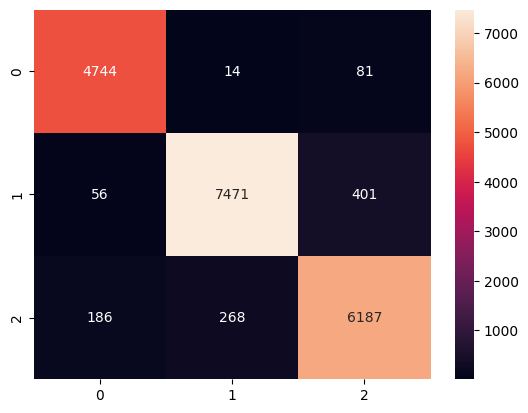

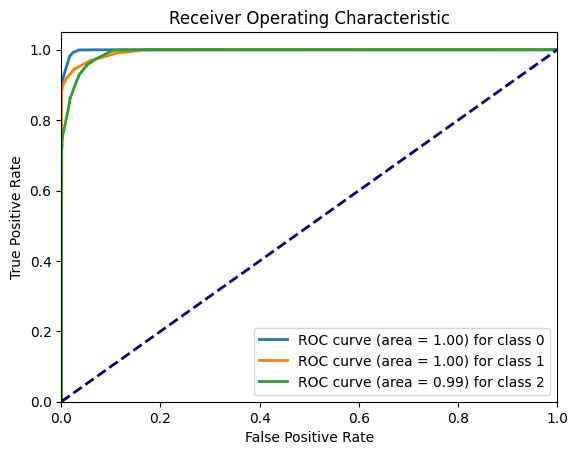

In [ ]:
from sklearn.preprocessing import label_binarize
from xgboost import XGBClassifier

# Initialize the XGBoost Classifier
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

xgb.fit(X_train_scaled, y_train)
y_pred = xgb.predict(X_test_scaled)

# Generate classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.show()

y_test_bin = label_binarize(y_test, classes=xgb.classes_)
y_prob = xgb.predict_proba(X_test_scaled)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_test_bin.shape[1]
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve (area = %0.2f) for class %s' % (roc_auc[i], xgb.classes_[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
!pip install shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 6.2 MB/s eta 0:00:00


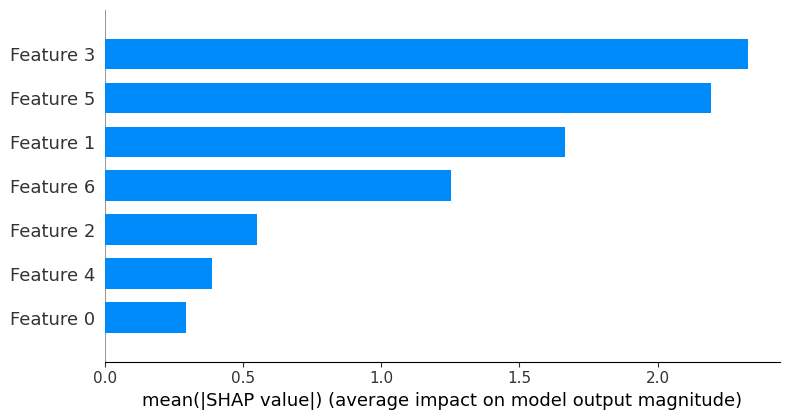

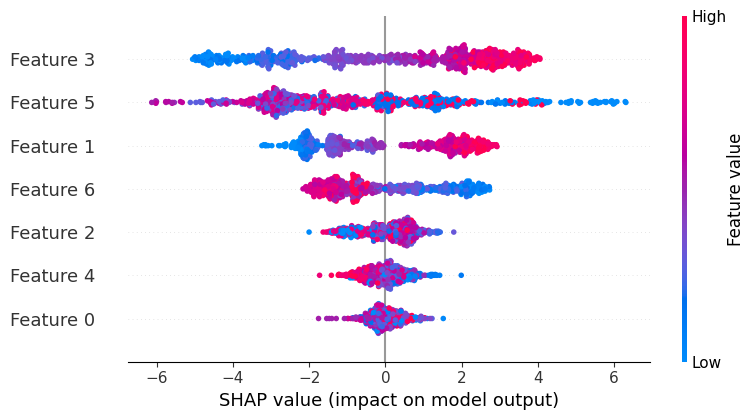

In [ ]:
import xgboost as xgb
import shap
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification  # Use your dataset here

# Example: Load your maternal health dataset
# Replace this with actual data loading (e.g., from a CSV)
# X, y = your_feature_matrix, your_target_vector
# For example purposes, I'll use a synthetic dataset:

X, y = make_classification(n_samples=1014, n_features=7)  # Example placeholder

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train an XGBoost classifier
model = xgb.XGBClassifier()
model.fit(X_train, y_train)

# Create a SHAP explainer for the trained model
explainer = shap.Explainer(model, X_train)

# Calculate SHAP values for the training dataset
shap_values = explainer(X_train)

# Plot the SHAP summary (bar chart for feature importance)
shap.summary_plot(shap_values, X_train, plot_type="bar")

# Optional: Standard SHAP summary plot (beeswarm plot)
shap.summary_plot(shap_values, X_train)


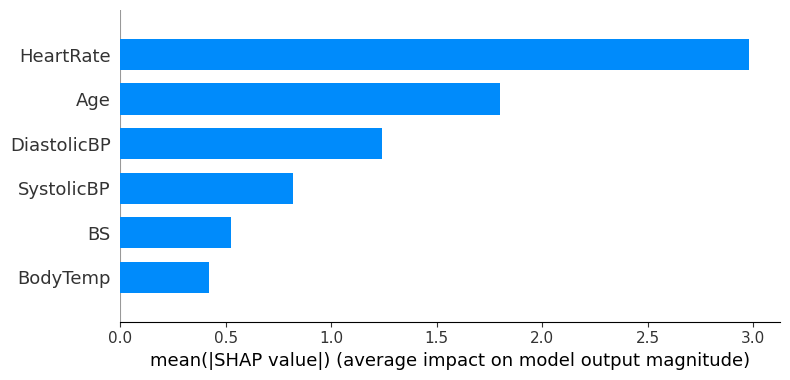

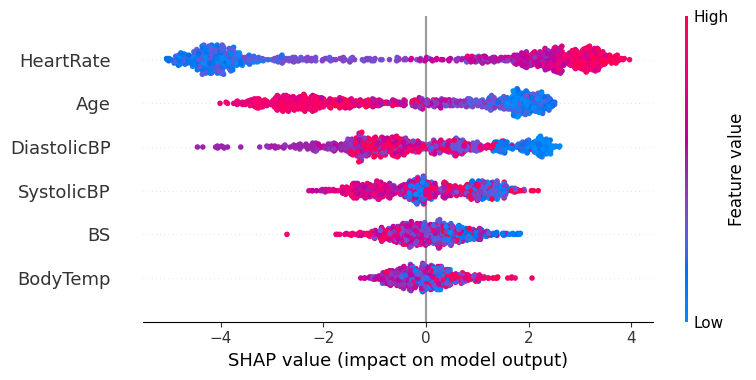

In [7]:
import xgboost as xgb
import shap
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification  # Use your dataset here

# Example: Load your maternal health dataset
# Replace this with actual data loading (e.g., from a CSV)
# X, y = your_feature_matrix, your_target_vector
# For demonstration purposes, I'll use a synthetic dataset:

X, y = make_classification(n_samples=1014, n_features=6)  # Example placeholder

# Define feature names for your dataset (replace with actual feature names from your dataset)
feature_names = ["Age", "SystolicBP", "DiastolicBP", "BS", "BodyTemp", "HeartRate"]  # Example names

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train an XGBoost classifier
model = xgb.XGBClassifier()
model.fit(X_train, y_train)

# Create a SHAP explainer for the trained model
explainer = shap.Explainer(model, X_train)

# Calculate SHAP values for the training dataset
shap_values = explainer(X_train)

# Plot the SHAP summary (bar chart for feature importance) with feature names
shap.summary_plot(shap_values, X_train, feature_names=feature_names, plot_type="bar")

# Optional: Standard SHAP summary plot (beeswarm plot) with feature names
shap.summary_plot(shap_values, X_train, feature_names=feature_names)


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [14:16:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [14:16:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [14:16:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [14:16:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [14:16:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

Optimal number of features: 6
Ranking of features: [1 1 1 1 1 1]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.97      4839
           1       0.96      0.94      0.95      7928
           2       0.93      0.93      0.93      6641

    accuracy                           0.95     19408
   macro avg       0.95      0.95      0.95     19408
weighted avg       0.95      0.95      0.95     19408

Confusion Matrix:
 [[4744   14   81]
 [  56 7471  401]
 [ 186  268 6187]]


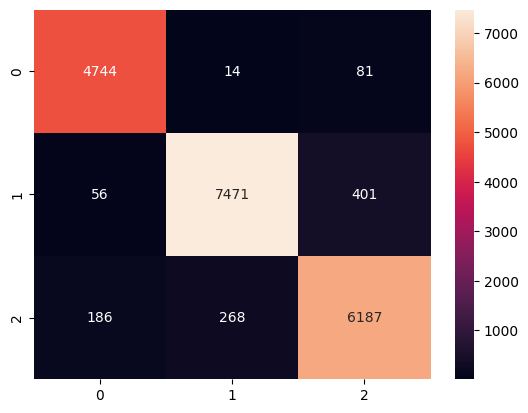

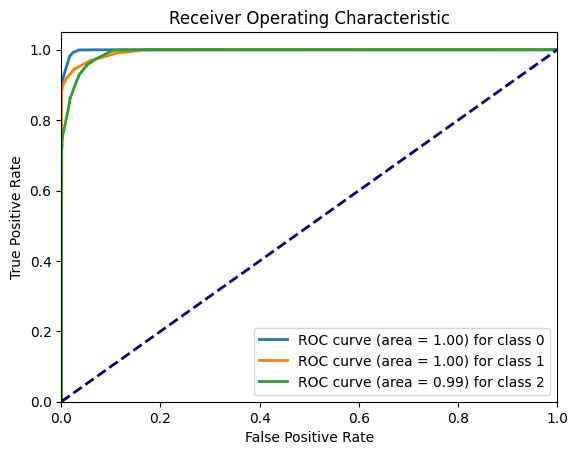

In [ ]:
from sklearn.feature_selection import RFECV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import label_binarize
from xgboost import XGBClassifier

# Initialize the XGBoost Classifier
xgb = XGBClassifier(random_state=33, use_label_encoder=False, eval_metric='logloss')

# Apply RFECV to select important features
rfecv = RFECV(estimator=xgb, step=1, cv=5, scoring='accuracy')
rfecv.fit(X_train_scaled, y_train)

y_pred = rfecv.predict(X_test_scaled)

# Selected features
print(f"Optimal number of features: {rfecv.n_features_}")
print(f"Ranking of features: {rfecv.ranking_}")

# Generate classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.show()

y_test_bin = label_binarize(y_test, classes=rfecv.classes_)
y_prob = rfecv.predict_proba(X_test_scaled)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_test_bin.shape[1]
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve (area = %0.2f) for class %s' % (roc_auc[i], rfecv.classes_[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
!pip install shap
import shap

In [ ]:
# Initialize the XGBoost Classifier
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Fit the model to your training data (make sure X_train_scaled and y_train are defined)
xgb.fit(X_train_scaled, y_train)

# Initialize SHAP explainer for the trained XGBoost model
explainer = shap.TreeExplainer(xgb)

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test_scaled)

# Convert y_test back to original labels for better interpretation
y_test_labels = le.inverse_transform(y_test)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [14:31:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


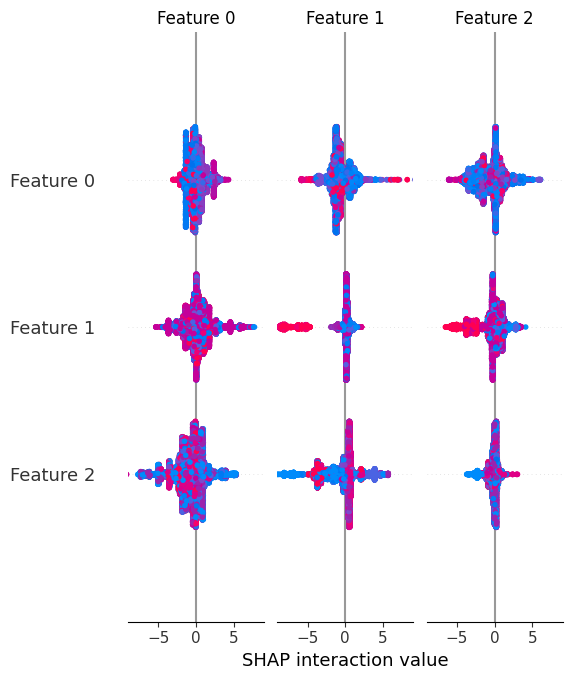

In [ ]:
# Summary plot for global feature importance
shap.summary_plot(shap_values, X_test_scaled, plot_type='bar', class_names=le.classes_)

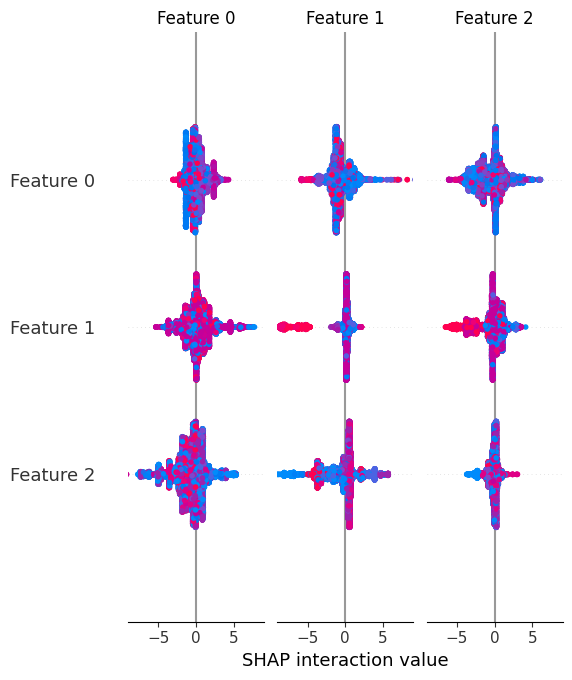

In [ ]:
import shap
explainer = shap.TreeExplainer(xgb)  # For tree-based models
shap_values = explainer.shap_values(X_test_scaled)
shap.summary_plot(shap_values, X_test_scaled)


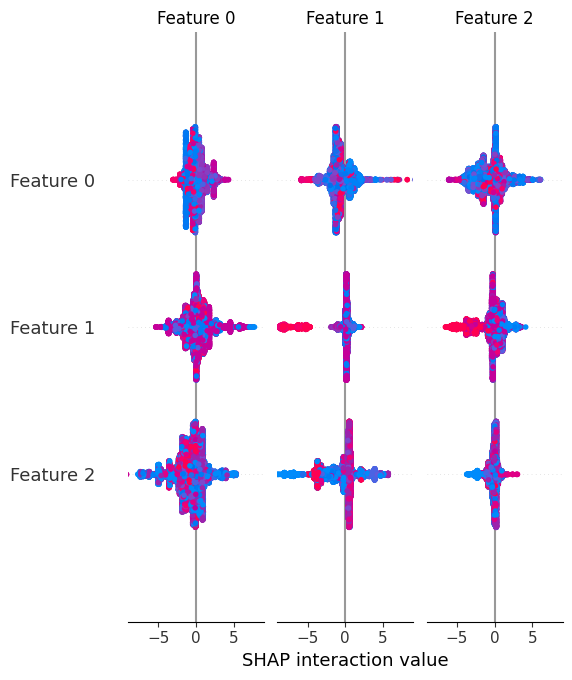

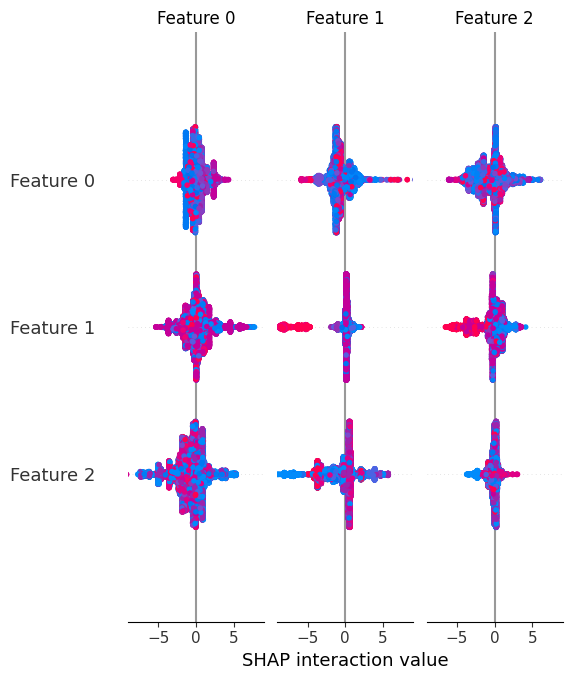

In [ ]:
# Initialize SHAP explainer for XGBoost model
explainer = shap.TreeExplainer(xgb)

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test_scaled)

# Plot the summary plot for average impact
shap.summary_plot(shap_values, X_test_scaled, plot_type='bar')

# Plot the summary plot with feature distribution
shap.summary_plot(shap_values, X_test_scaled)



In [ ]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=df7d3ea5ab887761b8d97c1cc25024b91f78f3769a3d5dbe97be88bc2a84ac0c
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
import lime
from lime.lime_tabular import LimeTabularExplainer

# Get feature names from the original DataFrame (X_train)
feature_names = list(X_train.columns)  # Assuming X_train is the original DataFrame

explainer = LimeTabularExplainer(X_train_scaled, feature_names=feature_names, class_names=['Low Risk', 'Mid Risk', 'High Risk'])
exp = explainer.explain_instance(X_test.iloc[0], xgb.predict_proba)
exp.show_in_notebook()

explainer = LimeTabularExplainer(X_train_scaled, feature_names=feature_names, class_names=['Low Risk', 'Mid Risk', 'High Risk'])
exp = explainer.explain_instance(X_test.iloc[1], xgb.predict_proba)
exp.show_in_notebook()

explainer = LimeTabularExplainer(X_train_scaled, feature_names=feature_names, class_names=['Low Risk', 'Mid Risk', 'High Risk'])
exp = explainer.explain_instance(X_test.iloc[2], xgb.predict_proba)
exp.show_in_notebook()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
import lime
from lime.lime_tabular import LimeTabularExplainer

# Get feature names from the original DataFrame (X_train)
feature_names = list(X_train.columns)

# Initialize LIME explainer with appropriate scaling and feature names
explainer = LimeTabularExplainer(X_train_scaled, feature_names=feature_names,
                                 class_names=['Low Risk', 'Mid Risk', 'High Risk'],
                                 discretize_continuous=True)

# Select an instance from the test set
instance_to_explain = X_test.iloc[0]

# Generate LIME explanation for the specific instance, focusing on "Low Risk" (class index 0)
exp = explainer.explain_instance(instance_to_explain, xgb.predict_proba, labels=[0])

# Display the explanation in notebook format
exp.show_in_notebook()

# Select an instance from the test set
instance_to_explain = X_test.iloc[1]

# Generate LIME explanation for the specific instance, focusing on "Mid Risk" (class index 1)
exp = explainer.explain_instance(instance_to_explain, xgb.predict_proba, labels=[1])

# Display the explanation in notebook format
exp.show_in_notebook()

# Select an instance from the test set
instance_to_explain = X_test.iloc[2]

# Generate LIME explanation for the specific instance, focusing on "High Risk" (class index 2)
exp = explainer.explain_instance(instance_to_explain, xgb.predict_proba, labels=[2])

# Display the explanation in notebook format
exp.show_in_notebook()


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
import lime
from lime.lime_tabular import LimeTabularExplainer
import numpy as np

# Get feature names from the original DataFrame (X_train)
feature_names = list(X_train.columns)

# Initialize LIME explainer
explainer = LimeTabularExplainer(X_train_scaled, feature_names=feature_names,
                                 class_names=['Low Risk', 'Mid Risk', 'High Risk'],
                                 discretize_continuous=True)

# Get predicted probabilities for the test set
y_pred_proba = xgb.predict_proba(X_test)

# 1. Find and explain an instance with a significant probability for "Low Risk" (class 0)
low_risk_indices = np.where(y_pred_proba[:, 0] > 0.5)[0]  # Adjust threshold as needed
if len(low_risk_indices) > 0:
    instance_to_explain = X_test.iloc[low_risk_indices[0]]
    exp = explainer.explain_instance(instance_to_explain, xgb.predict_proba, labels=[0])
    exp.show_in_notebook()
else:
    print("No instances with significant 'Low Risk' predictions found.")

# 2. Find and explain an instance with a significant probability for "Mid Risk" (class 1)
mid_risk_indices = np.where(y_pred_proba[:, 1] > 0.5)[0]  # Adjust threshold as needed
if len(mid_risk_indices) > 0:
    instance_to_explain = X_test.iloc[mid_risk_indices[1]]
    exp = explainer.explain_instance(instance_to_explain, xgb.predict_proba, labels=[1])
    exp.show_in_notebook()
else:
    print("No instances with significant 'Mid Risk' predictions found.")

# 3. Find and explain an instance with a significant probability for "High Risk" (class 2)
high_risk_indices = np.where(y_pred_proba[:, 2] > 0.5)[0]  # Adjust threshold as needed
if len(high_risk_indices) > 0:
    instance_to_explain = X_test.iloc[high_risk_indices[2]]
    exp = explainer.explain_instance(instance_to_explain, xgb.predict_proba, labels=[2])
    exp.show_in_notebook()
else:
    print("No instances with significant 'High Risk' predictions found.")



Output hidden; open in https://colab.research.google.com to view.

In [ ]:
!pip install alibi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.1/522.1 kB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.7/14.7 MB 80.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 7.6 MB/s eta 0:00:00
  Attempting uninstall: attrs
    Found existing installation: attrs 24.2.0
    Uninstalling attrs-24.2.0:
      Successfully uninstalled attrs-24.2.0
  Attempting uninstall: scikit-image
    Found existing installation: scikit-image 0.23.2
    Uninstalling scikit-image-0.23.2:
      Successfully uninstalled scikit-image-0.23.2


In [ ]:
from alibi.explainers import AnchorTabular
!pip install IPython
from IPython.display import display
import pandas as pd

explainer = AnchorTabular(predictor=xgb.predict, feature_names=X_train.columns.tolist())
explainer.fit(X_train_scaled)
# Use array indexing instead of .iloc
explanation = explainer.explain(X_test_scaled[0])
display(explanation.anchor) # Display the anchor
# Check if explanation.precision is a valid value before creating DataFrame
if explanation.precision:
    display(pd.DataFrame([explanation.precision], columns=['Precision'])) # Create DataFrame with a list
else:
    print("Explanation precision is not available.")
# explanation.show_in_notebook() # Removed this line

['-0.56 < BS <= -0.18',
 'SystolicBP <= 0.42',
 'BodyTemp <= -0.52',
 'DiastolicBP <= -0.81']

,Precision
0,0.968059


from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_0.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Precision']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Precision'}, axis=1)
              .sort_values('Precision', ascending=True))
  xs = counted['Precision']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_1.sort_values('Precision', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Precision')
_ = plt.ylabel('count()')

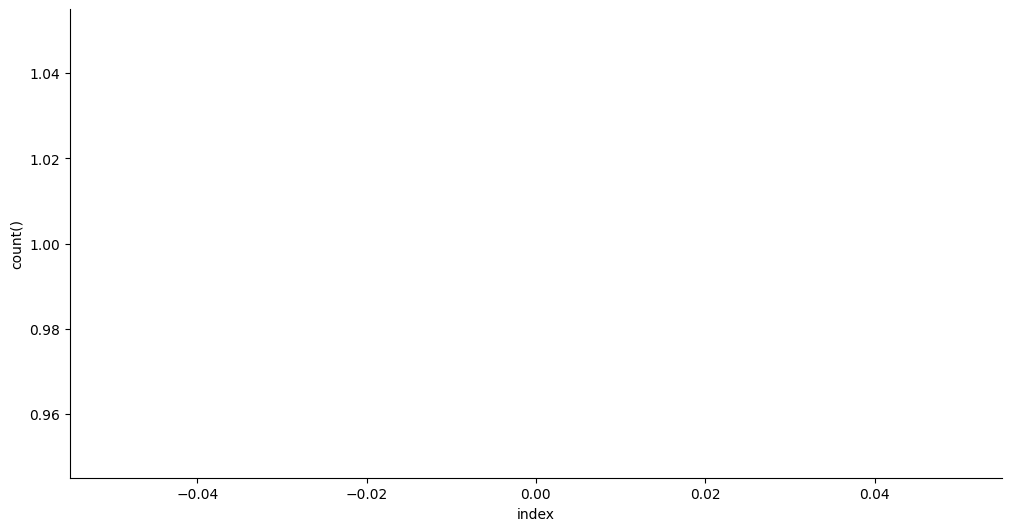

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_0.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:51:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:51:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:51:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:51:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:51:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95      4839
           1       0.93      0.93      0.93      7928
           2       0.90      0.89      0.90      6641

    accuracy                           0.92     19408
   macro avg       0.92      0.93      0.93     19408
weighted avg       0.92      0.92      0.92     19408

Confusion Matrix:
 [[4662   52  125]
 [  71 7360  497]
 [ 213  526 5902]]


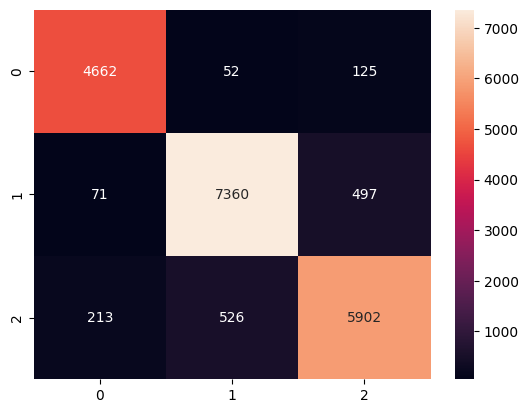

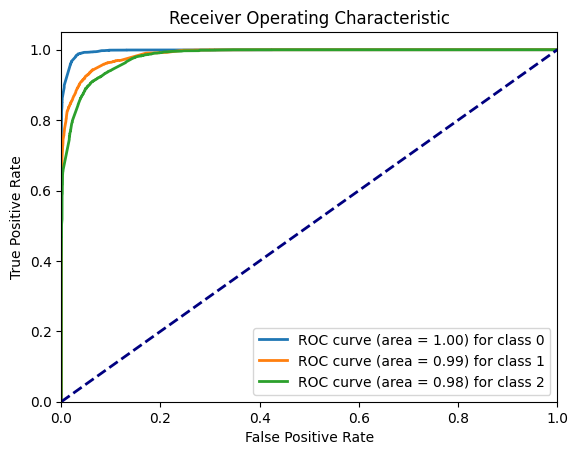

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.feature_selection import SequentialFeatureSelector
from xgboost import XGBClassifier

# Initialize the XGBoost Classifier
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Apply Forward Feature Selection
ffs = SequentialFeatureSelector(xgb, n_features_to_select='auto', direction='forward', scoring='accuracy', cv=5)
ffs.fit(X_train_scaled, y_train)

# Transform the datasets to only include selected features
X_train_ffs = ffs.transform(X_train_scaled)
X_test_ffs = ffs.transform(X_test_scaled)

# Train the Random Forest classifier on the selected features
xgb.fit(X_train_ffs, y_train)
y_pred = xgb.predict(X_test_ffs)

# Generate classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.show()

y_test_bin = label_binarize(y_test, classes=xgb.classes_)
y_prob = xgb.predict_proba(X_test_ffs)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_test_bin.shape[1]
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve (area = %0.2f) for class %s' % (roc_auc[i], xgb.classes_[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters found:  {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300, 'subsample': 1.0}
Training Accuracy:  0.9517313340547225
Test Accuracy:  0.9496084089035449
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.97      4839
           1       0.97      0.94      0.95      7928
           2       0.93      0.94      0.93      6641

    accuracy                           0.95     19408
   macro avg       0.95      0.95      0.95     19408
weighted avg       0.95      0.95      0.95     19408

Confusion Matrix:
 [[4748   11   80]
 [  56 7472  400]
 [ 180  251 6210]]


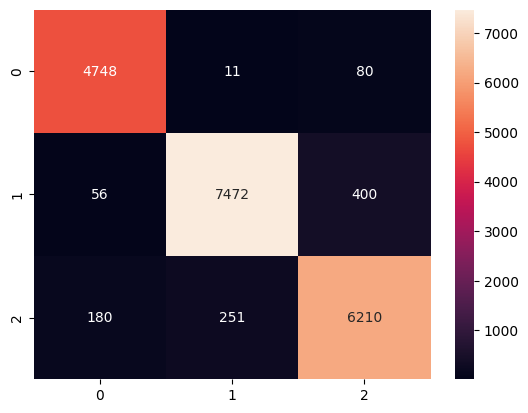

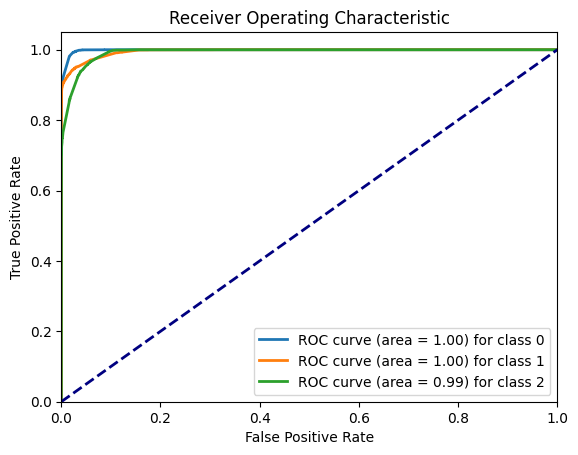

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier


# Step 6: Set up XGBoost and Grid Search
xgb_model = XGBClassifier()

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)

# Step 7: Fit the model
grid_search.fit(X_train_scaled, y_train)

# Step 8: Best parameters and model evaluation
best_xgb = grid_search.best_estimator_
print("Best parameters found: ", grid_search.best_params_)
print("Training Accuracy: ", best_xgb.score(X_train_scaled, y_train))
print("Test Accuracy: ", best_xgb.score(X_test_scaled, y_test))

y_pred = best_xgb.predict(X_test_scaled)

# Selected features
#print(f"Optimal number of features: {best_xgb.n_features_}")
#print(f"Ranking of features: {best_xgb.ranking_}")

# Generate classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.show()

y_test_bin = label_binarize(y_test, classes=best_xgb.classes_)
y_prob = best_xgb.predict_proba(X_test_scaled)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_test_bin.shape[1]
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve (area = %0.2f) for class %s' % (roc_auc[i], best_xgb.classes_[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

**Support Vector Machine**

Classification Report:
               precision    recall  f1-score   support

   high risk       0.91      0.93      0.92      8111
    low risk       0.76      0.90      0.82     11909
    mid risk       0.82      0.62      0.71      9980

    accuracy                           0.81     30000
   macro avg       0.83      0.82      0.82     30000
weighted avg       0.82      0.81      0.81     30000

Confusion Matrix:
 [[ 7524   179   408]
 [  229 10701   979]
 [  540  3221  6219]]


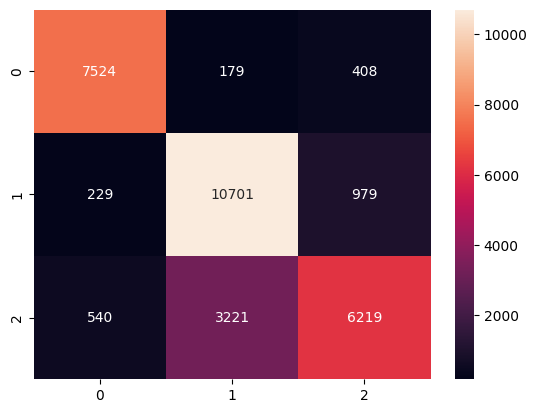

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


ValueError: multiclass format is not supported

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, RocCurveDisplay

# Apply a classification algorithm (SVM in this case)
model = SVC(probability=True, random_state=42)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

# Generate classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.show()

# Generate ROC curve
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.feature_selection import RFECV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc


# Initialize SVM model
svm = SVC(kernel='linear', probability=True)

# Apply RFECV to select important features
rfecv = RFECV(estimator=svm, step=1, cv=5, scoring='accuracy')
rfecv.fit(X_train_scaled, y_train)

y_pred = rfecv.predict(X_test_scaled)

# Selected features
print(f"Optimal number of features: {rfecv.n_features_}")
print(f"Ranking of features: {rfecv.ranking_}")

# Generate classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.show()

y_test_bin = label_binarize(y_test, classes=rfecv.classes_)
y_prob = rfecv.predict_proba(X_test_scaled)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_test_bin.shape[1]
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve (area = %0.2f) for class %s' % (roc_auc[i], rfecv.classes_[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.feature_selection import SequentialFeatureSelector

# Initialize SVM model
svm = SVC(kernel='linear', probability=True)


# Apply Forward Feature Selection
ffs = SequentialFeatureSelector(svm, n_features_to_select='auto', direction='forward', scoring='accuracy', cv=5)
ffs.fit(X_train, y_train)

# Transform the datasets to only include selected features
X_train_ffs = ffs.transform(X_train)
X_test_ffs = ffs.transform(X_test)

# Train the Decision Tree classifier on the selected features
svm.fit(X_train_ffs, y_train)
y_pred = svm.predict(X_test_ffs)

# Generate classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.show()


# Generate ROC curve
y_test_bin = label_binarize(y_test, classes=svm.classes_)
y_prob = svm.predict_proba(X_test_ffs)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_test_bin.shape[1]
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve (area = %0.2f) for class %s' % (roc_auc[i], svm.classes_[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

**Random Forest**

Classification Report:
               precision    recall  f1-score   support

   high risk       0.95      0.98      0.97      8111
    low risk       0.98      0.93      0.95     11909
    mid risk       0.92      0.94      0.93      9980

    accuracy                           0.95     30000
   macro avg       0.95      0.95      0.95     30000
weighted avg       0.95      0.95      0.95     30000

Confusion Matrix:
 [[ 7978    22   111]
 [   91 11107   711]
 [  301   261  9418]]


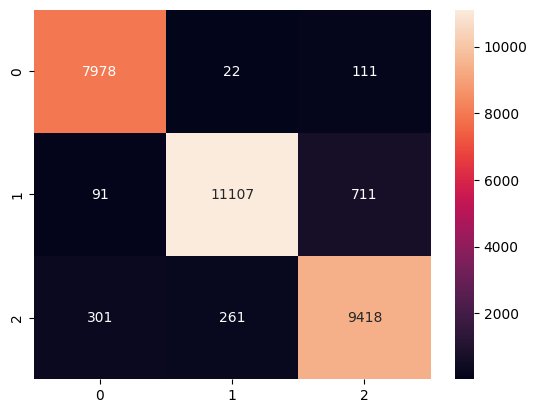

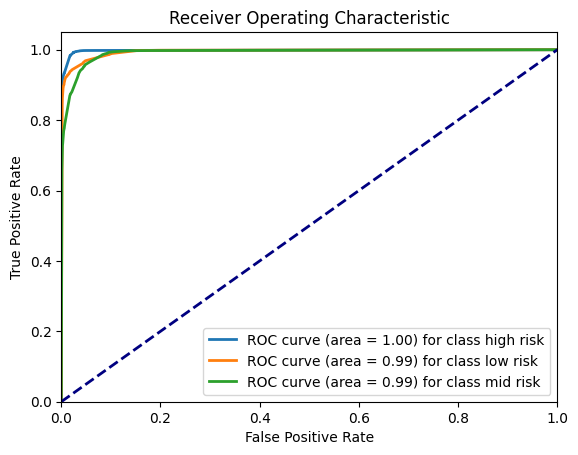

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.ensemble import RandomForestClassifier

# Apply a classification algorithm (Random Forest in this case)
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

# Generate classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.show()



y_test_bin = label_binarize(y_test, classes=model.classes_)
y_prob = model.predict_proba(X_test_scaled)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_test_bin.shape[1]
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve (area = %0.2f) for class %s' % (roc_auc[i], model.classes_[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

Classification Report:
               precision    recall  f1-score   support

   high risk       0.94      0.97      0.96      8111
    low risk       0.95      0.91      0.93     11909
    mid risk       0.89      0.91      0.90      9980

    accuracy                           0.92     30000
   macro avg       0.92      0.93      0.93     30000
weighted avg       0.93      0.92      0.92     30000

Confusion Matrix:
 [[ 7908    46   157]
 [  140 10789   980]
 [  366   565  9049]]


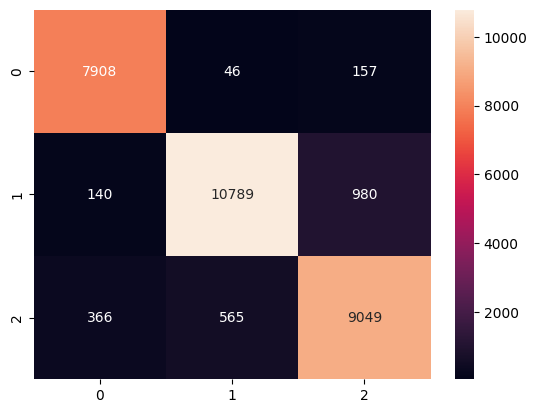

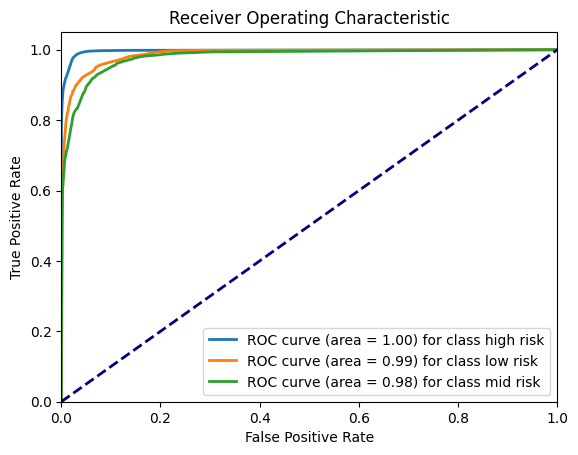

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SequentialFeatureSelector

# Apply a classification algorithm (Random Forest in this case)
rf = RandomForestClassifier(random_state=50)

# Apply Forward Feature Selection
ffs = SequentialFeatureSelector(rf, n_features_to_select='auto', direction='forward', scoring='accuracy', cv=5)
ffs.fit(X_train_scaled, y_train)

# Transform the datasets to only include selected features
X_train_ffs = ffs.transform(X_train_scaled)
X_test_ffs = ffs.transform(X_test_scaled)

# Train the Random Forest classifier on the selected features
rf.fit(X_train_ffs, y_train)
y_pred = rf.predict(X_test_ffs)

# Generate classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.show()

y_test_bin = label_binarize(y_test, classes=rf.classes_)
y_prob = rf.predict_proba(X_test_ffs)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_test_bin.shape[1]
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve (area = %0.2f) for class %s' % (roc_auc[i], rf.classes_[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

Optimal number of features: 6
Ranking of features: [1 1 1 1 1 1]
Classification Report:
               precision    recall  f1-score   support

   high risk       0.95      0.98      0.97      8111
    low risk       0.98      0.93      0.95     11909
    mid risk       0.92      0.94      0.93      9980

    accuracy                           0.95     30000
   macro avg       0.95      0.95      0.95     30000
weighted avg       0.95      0.95      0.95     30000

Confusion Matrix:
 [[ 7978    22   111]
 [   92 11108   709]
 [  301   258  9421]]


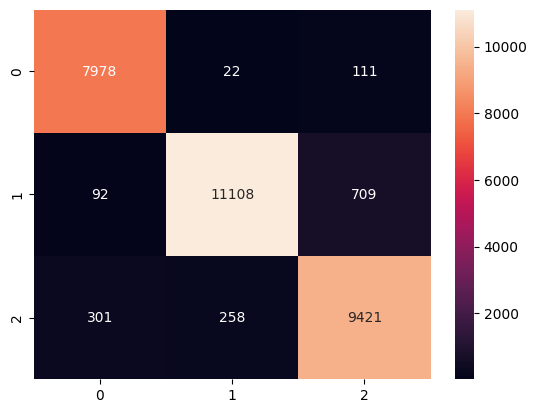

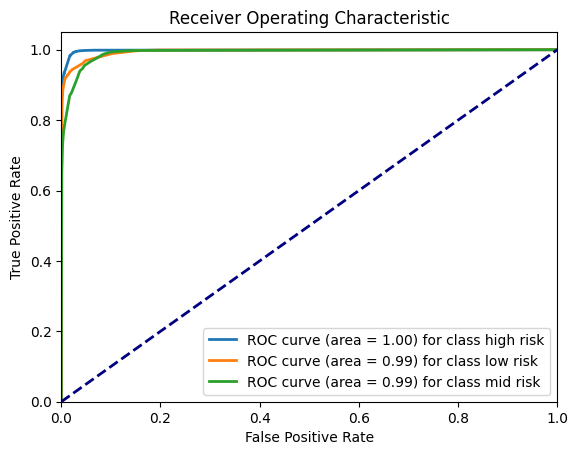

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import label_binarize

# Define the model
model = RandomForestClassifier()

# Apply RFECV to select important features
rfecv = RFECV(estimator=model, step=1, cv=5, scoring='accuracy')
rfecv.fit(X_train_scaled, y_train)

y_pred = rfecv.predict(X_test_scaled)

# Selected features
print(f"Optimal number of features: {rfecv.n_features_}")
print(f"Ranking of features: {rfecv.ranking_}")

# Generate classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.show()

y_test_bin = label_binarize(y_test, classes=rfecv.classes_)
y_prob = rfecv.predict_proba(X_test_scaled)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_test_bin.shape[1]
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve (area = %0.2f) for class %s' % (roc_auc[i], rfecv.classes_[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=9294ffaa066dc5085335fe73614c8f3adabbcbce88247768b5c17d1d867c3b67
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
import lime
import lime.lime_tabular
import pandas as pd # Import pandas

# LIME for explanation
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train_scaled[:, rfecv.support_],
    feature_names=pd.DataFrame(X_test_scaled).columns[rfecv.support_],  # Convert X_test_scaled to DataFrame to access columns
    class_names=['Low Risk', 'Medium Risk', 'High Risk'],  # Change based on your classes
    mode='classification'
)

# Pick an instance from the test set for explanation
i = 5  # Choose any instance index for explanation
exp = explainer.explain_instance(
    X_test_scaled[i, rfecv.support_],
     .predict_proba
)

# Display the explanation
exp.show_in_notebook()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from lime.lime_tabular import LimeTabularExplainer

# Convert X_train_scaled back to a Pandas DataFrame (if it was originally a DataFrame)
X_train_scaled = pd.DataFrame(X_train_scaled) # Convert the NumPy array back to a Pandas DataFrame

# Initialize LIME Tabular Explainer
explainer = LimeTabularExplainer(
    training_data=X_train_scaled.values, # Use the values of the DataFrame
    feature_names=X_train_scaled.columns, # Access column names from the DataFrame
    class_names=['Low Risk', 'Medium Risk', 'High Risk'],  # Update with your class names
    mode='classification'
)

# Explain a prediction (for instance, the first instance in the test set)
idx = 0  # Index of the instance to explain
exp = explainer.explain_instance(
    X_test_scaled.iloc[idx],
    rf.predict_proba,
    num_features=10  # Number of features to show in the explanation
)

# Print and visualize the explanation
print(exp.as_list())  # List of feature importances and their contributions

# Plot the explanation
exp.as_pyplot_figure()
plt.show()


AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

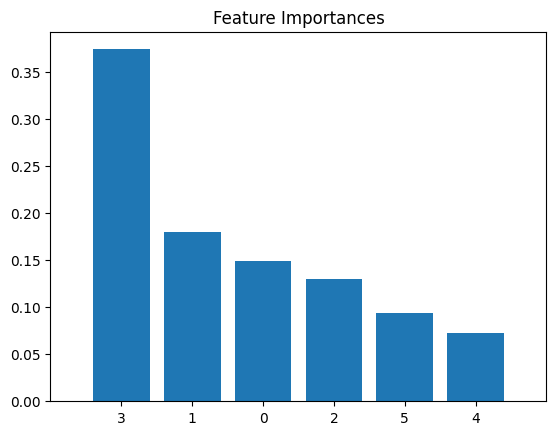

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Get the best estimator with selected features from RFECV
best_estimator = rfecv.estimator_

# Get feature importance from the best estimator
importances = best_estimator.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot feature importance
plt.figure()
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Hyperparameters: {'bootstrap': False, 'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}
Classification Report:
               precision    recall  f1-score   support

   high risk       0.95      0.98      0.97      8111
    low risk       0.97      0.94      0.95     11909
    mid risk       0.93      0.94      0.93      9980

    accuracy                           0.95     30000
   macro avg       0.95      0.95      0.95     30000
weighted avg       0.95      0.95      0.95     30000

Confusion Matrix:
 [[ 7974    21   116]
 [   89 11188   632]
 [  292   325  9363]]


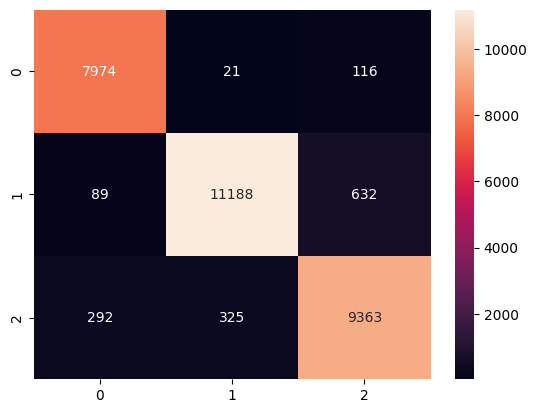

NameError: name 'label_binarize' is not defined

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import label_binarize

# Initialize the Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# Define the hyperparameters grid for tuning
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees
    'max_depth': [None, 10, 20, 30],  # Maximum depth of trees
    'min_samples_split': [2, 5, 10],  # Minimum samples to split an internal node
    'min_samples_leaf': [1, 2, 4],    # Minimum samples to be a leaf node
    'bootstrap': [True, False]        # Whether bootstrap samples are used when building trees
}

# Setup GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit the model
grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Train the Random Forest model with the best parameters
best_rf = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_rf.predict(X_test_scaled)

# Generate classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Generate confusion matrix and plot it
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()



# Binarize the labels for multi-class ROC curve
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_bin.shape[1]

y_test_bin = label_binarize(y_test, classes=best_rfclasses_)
y_prob = rfecv.predict_proba(X_test_scaled)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_test_bin.shape[1]
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve (area = %0.2f) for class %s' % (roc_auc[i],best_rf.classes_[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importance
importances = best_rf.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot feature importance
plt.figure()
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()
import matplotlib.pyplot as plt
import numpy as np

# Get feature importance
importances = best_rf.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot feature importance
plt.figure()
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()


NameError: name 'best_rf' is not defined

In [ ]:
pip install Shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 10.4 MB/s eta 0:00:00


**Shap**

In [ ]:
import shap

# Create SHAP explainer
explainer = shap.TreeExplainer(rfecv)
shap_values = explainer.shap_values(X_test_scaled)

# Plot SHAP summary plot
shap.summary_plot(shap_values[1], X_test_scaled)


Classification Report:
               precision    recall  f1-score   support

   high risk       0.92      0.95      0.94      8111
    low risk       0.94      0.90      0.92     11909
    mid risk       0.88      0.90      0.89      9980

    accuracy                           0.91     30000
   macro avg       0.91      0.92      0.92     30000
weighted avg       0.91      0.91      0.91     30000

Confusion Matrix:
 [[ 7730   130   251]
 [  230 10756   923]
 [  429   617  8934]]


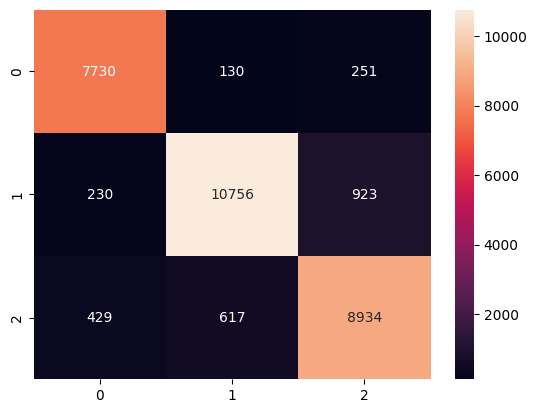

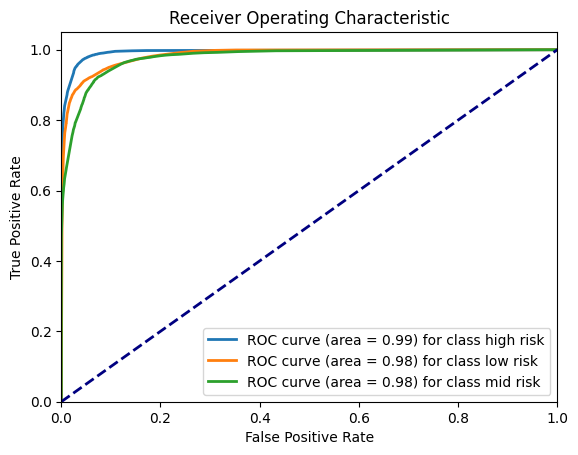

In [ ]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA


# Apply Linear Discriminant Analysis (LDA) for dimensionality reduction
lda = LDA(n_components=None)  # 'None' means LDA will determine the maximum number of components possible
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

# Initialize and train the Random Forest classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_lda, y_train)
y_pred = rf.predict(X_test_lda)

# Generate classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.show()

# Generate ROC curve
y_test_bin = label_binarize(y_test, classes=rf.classes_)
y_prob = rf.predict_proba(X_test_lda)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_test_bin.shape[1]
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve (area = %0.2f) for class %s' % (roc_auc[i], rf.classes_[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


Classification Report:
               precision    recall  f1-score   support

   high risk       0.94      0.97      0.96      8111
    low risk       0.95      0.91      0.93     11909
    mid risk       0.89      0.91      0.90      9980

    accuracy                           0.92     30000
   macro avg       0.92      0.93      0.93     30000
weighted avg       0.93      0.92      0.92     30000

Confusion Matrix:
 [[ 7907    47   157]
 [  140 10790   979]
 [  366   565  9049]]


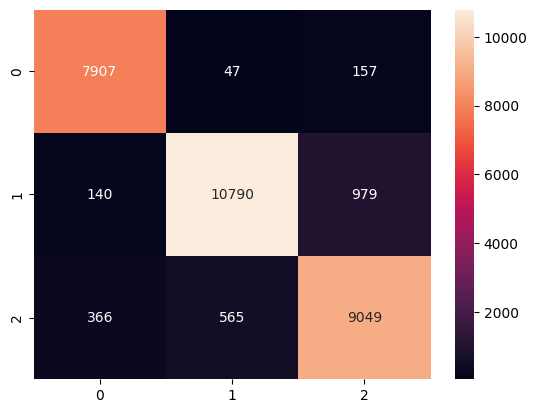

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


ValueError: X has 6 features, but RandomForestClassifier is expecting 3 features as input.

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SequentialFeatureSelector

# Apply a classification algorithm (Random Forest in this case)
rf = RandomForestClassifier(random_state=50)

# Apply Forward Feature Selection
ffs = SequentialFeatureSelector(rf, n_features_to_select='auto', direction='forward', scoring='accuracy', cv=5)
ffs.fit(X_train, y_train)

# Transform the datasets to only include selected features
X_train_ffs = ffs.transform(X_train)
X_test_ffs = ffs.transform(X_test)

# Train the Random Forest classifier on the selected features
rf.fit(X_train_ffs, y_train)
y_pred = rf.predict(X_test_ffs)

# Generate classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.show()

y_test_bin = label_binarize(y_test, classes=rf.classes_)
y_prob = rf.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_test_bin.shape[1]
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve (area = %0.2f) for class %s' % (roc_auc[i], model.classes_[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

Classification Report:
               precision    recall  f1-score   support

   high risk       0.94      0.97      0.96      8111
    low risk       0.95      0.91      0.93     11909
    mid risk       0.89      0.91      0.90      9980

    accuracy                           0.92     30000
   macro avg       0.92      0.93      0.93     30000
weighted avg       0.93      0.92      0.92     30000

Confusion Matrix:
 [[ 7907    47   157]
 [  140 10790   979]
 [  366   565  9049]]


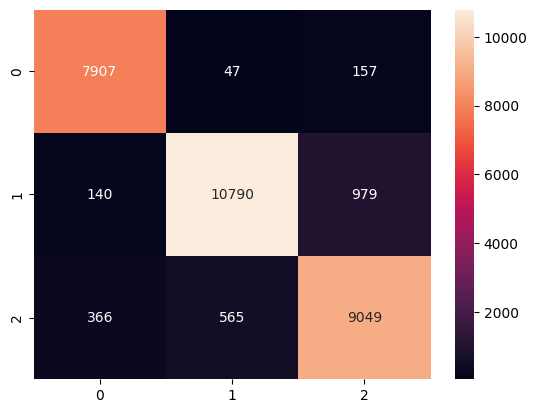

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SequentialFeatureSelector

# Apply a classification algorithm (Random Forest in this case)
rf = RandomForestClassifier(random_state=50)

#Apply Backward Feature Selection
bfs = SequentialFeatureSelector(rf, n_features_to_select='auto', direction='backward', scoring='accuracy', cv=5)
bfs.fit(X_train, y_train)

# Transform the datasets to only include selected features
X_train_bfs = bfs.transform(X_train)
X_test_bfs = bfs.transform(X_test)

# Train the Random Forest classifier on the selected features
rf.fit(X_train_bfs, y_train)
y_pred = rf.predict(X_test_bfs)

# Generate classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.show()



**Decision Tree Classifier**

Classification Report:
               precision    recall  f1-score   support

   high risk       0.94      0.97      0.96      8111
    low risk       0.95      0.90      0.92     11909
    mid risk       0.89      0.91      0.90      9980

    accuracy                           0.92     30000
   macro avg       0.92      0.93      0.93     30000
weighted avg       0.92      0.92      0.92     30000

Confusion Matrix:
 [[ 7897    48   166]
 [  149 10764   996]
 [  365   577  9038]]


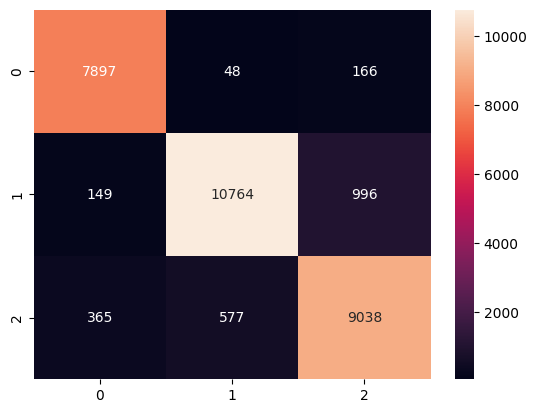

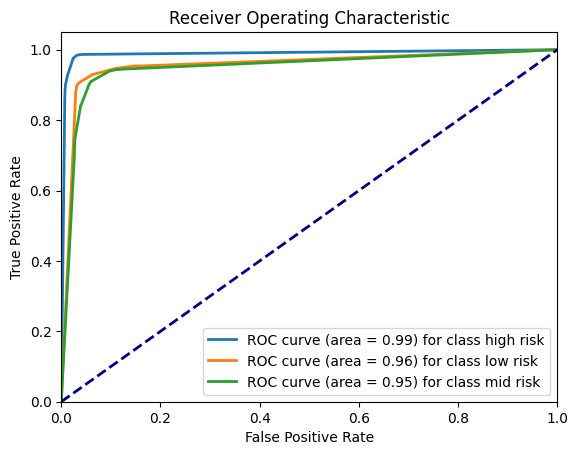

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.feature_selection import SequentialFeatureSelector


# Initialize the Decision Tree classifier
dt = DecisionTreeClassifier(random_state=42)

# Apply Forward Feature Selection
ffs = SequentialFeatureSelector(dt, n_features_to_select='auto', direction='forward', scoring='accuracy', cv=5)
ffs.fit(X_train, y_train)

# Transform the datasets to only include selected features
X_train_ffs = ffs.transform(X_train)
X_test_ffs = ffs.transform(X_test)

# Train the Decision Tree classifier on the selected features
dt.fit(X_train_ffs, y_train)
y_pred = dt.predict(X_test_ffs)

# Generate classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.show()


# Generate ROC curve
y_test_bin = label_binarize(y_test, classes=dt.classes_)
y_prob = dt.predict_proba(X_test_ffs)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_test_bin.shape[1]
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve (area = %0.2f) for class %s' % (roc_auc[i], dt.classes_[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

Optimal number of features: 6
Ranking of features: [1 1 1 1 1 1]
Classification Report:
               precision    recall  f1-score   support

   high risk       0.95      0.98      0.97      8111
    low risk       0.97      0.93      0.95     11909
    mid risk       0.92      0.94      0.93      9980

    accuracy                           0.95     30000
   macro avg       0.95      0.95      0.95     30000
weighted avg       0.95      0.95      0.95     30000

Confusion Matrix:
 [[ 7963    31   117]
 [   94 11089   726]
 [  303   270  9407]]


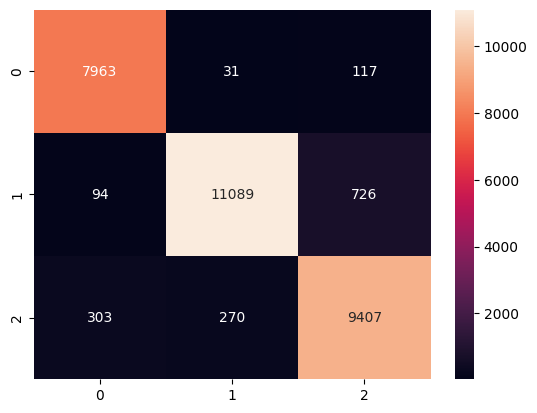

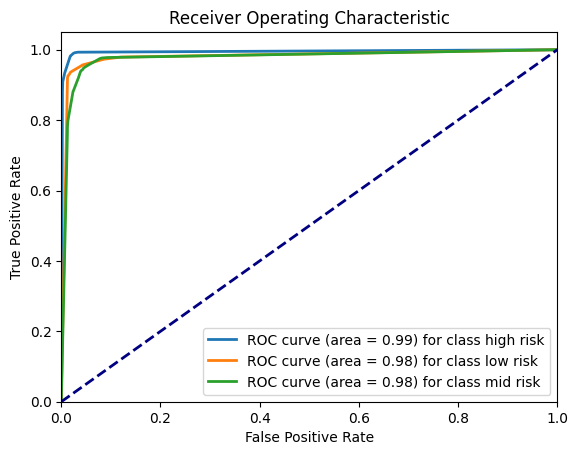

In [ ]:

from sklearn.feature_selection import RFECV
from sklearn.preprocessing import label_binarize
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc


# Initialize the Decision Tree classifier
dt = DecisionTreeClassifier(random_state=42)

# Apply RFECV to select important features
rfecv = RFECV(estimator=dt, step=1, cv=5, scoring='accuracy')
rfecv.fit(X_train_scaled, y_train)

y_pred = rfecv.predict(X_test_scaled)

# Selected features
print(f"Optimal number of features: {rfecv.n_features_}")
print(f"Ranking of features: {rfecv.ranking_}")

# Generate classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.show()

y_test_bin = label_binarize(y_test, classes=rfecv.classes_)
y_prob = rfecv.predict_proba(X_test_scaled)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_test_bin.shape[1]
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve (area = %0.2f) for class %s' % (roc_auc[i], rfecv.classes_[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

**Logistic Regression**

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification Report:
               precision    recall  f1-score   support

   high risk       0.75      0.73      0.74      8111
    low risk       0.65      0.78      0.71     11909
    mid risk       0.46      0.36      0.40      9980

    accuracy                           0.63     30000
   macro avg       0.62      0.62      0.62     30000
weighted avg       0.61      0.63      0.62     30000

Confusion Matrix:
 [[5914  298 1899]
 [ 311 9282 2316]
 [1631 4752 3597]]


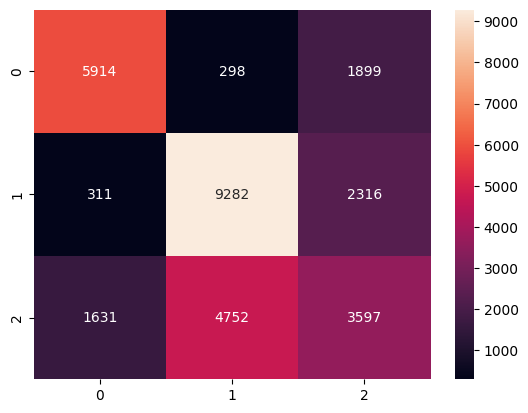

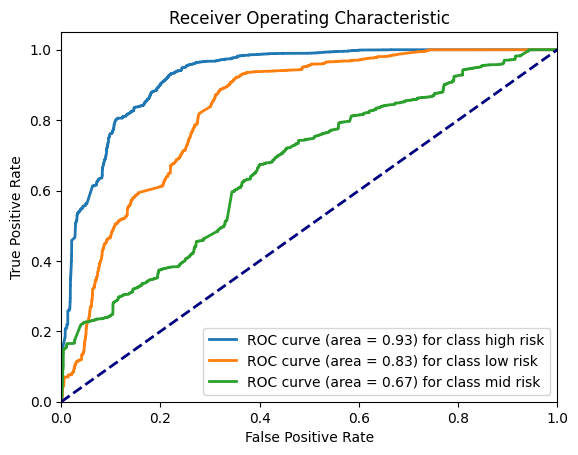

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.feature_selection import SequentialFeatureSelector


# Initialize the Logistic Regression classifier
lr = LogisticRegression(random_state=20, max_iter=1000)
lr.fit(X_train, y_train)


y_pred = lr.predict(X_test)

# Generate classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.show()

# Generate ROC curve
y_test_bin = label_binarize(y_test, classes=lr.classes_)
y_prob = lr.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_test_bin.shape[1]
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve (area = %0.2f) for class %s' % (roc_auc[i], lr.classes_[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


Classification Report:
               precision    recall  f1-score   support

   high risk       0.82      0.61      0.70      8111
    low risk       0.66      0.86      0.75     11909
    mid risk       0.47      0.40      0.43      9980

    accuracy                           0.64     30000
   macro avg       0.65      0.62      0.63     30000
weighted avg       0.64      0.64      0.63     30000

Confusion Matrix:
 [[ 4970   240  2901]
 [  108 10297  1504]
 [  992  5027  3961]]


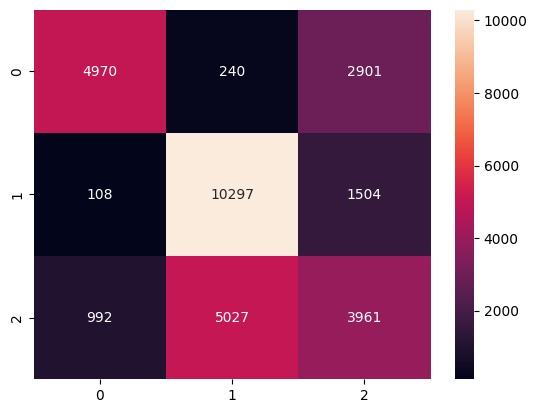

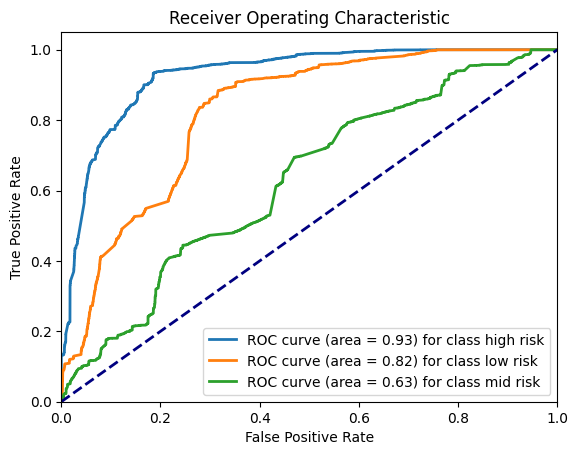

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.feature_selection import SequentialFeatureSelector


# Initialize the Logistic Regression classifier
lr = LogisticRegression(random_state=20, max_iter=1000)

# Apply Forward Feature Selection
ffs = SequentialFeatureSelector(lr, n_features_to_select='auto', direction='forward', scoring='accuracy', cv=5)
ffs.fit(X_train, y_train)

# Transform the datasets to only include selected features
X_train_ffs = ffs.transform(X_train)
X_test_ffs = ffs.transform(X_test)

# Train the Logistic Regression classifier on the selected features
lr.fit(X_train_ffs, y_train)
y_pred = lr.predict(X_test_ffs)

# Generate classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.show()

# Generate ROC curve
y_test_bin = label_binarize(y_test, classes=lr.classes_)
y_prob = lr.predict_proba(X_test_ffs)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_test_bin.shape[1]
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve (area = %0.2f) for class %s' % (roc_auc[i], lr.classes_[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


Optimal number of features: 6
Ranking of features: [1 1 1 1 1 1]
Classification Report:
               precision    recall  f1-score   support

   high risk       0.75      0.73      0.74      8111
    low risk       0.65      0.78      0.71     11909
    mid risk       0.46      0.36      0.40      9980

    accuracy                           0.63     30000
   macro avg       0.62      0.62      0.62     30000
weighted avg       0.61      0.63      0.62     30000

Confusion Matrix:
 [[5915  299 1897]
 [ 310 9288 2311]
 [1631 4754 3595]]


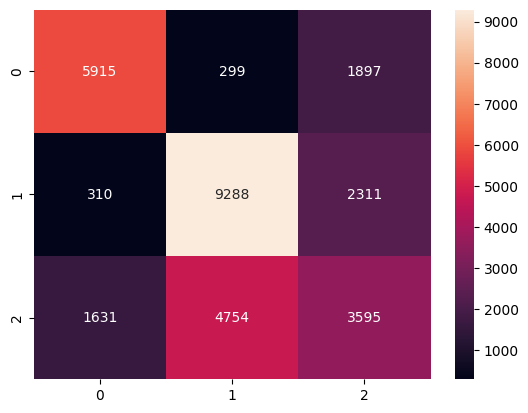

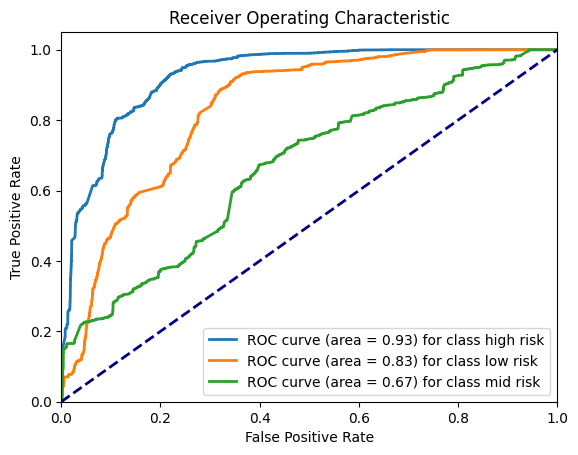

In [ ]:
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import label_binarize
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

# Initialize the Logistic Regression classifier
lr = LogisticRegression(random_state=20, max_iter=1000)

# Apply RFECV to select important features
rfecv = RFECV(estimator=lr, step=1, cv=5, scoring='accuracy')
rfecv.fit(X_train_scaled, y_train)

y_pred = rfecv.predict(X_test_scaled)

# Selected features
print(f"Optimal number of features: {rfecv.n_features_}")
print(f"Ranking of features: {rfecv.ranking_}")

# Generate classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.show()

y_test_bin = label_binarize(y_test, classes=rfecv.classes_)
y_prob = rfecv.predict_proba(X_test_scaled)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_test_bin.shape[1]
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve (area = %0.2f) for class %s' % (roc_auc[i], rfecv.classes_[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

**KNeighbors Classifier**

Classification Report:
               precision    recall  f1-score   support

   high risk       0.96      0.96      0.96      8111
    low risk       0.97      0.93      0.95     11909
    mid risk       0.90      0.95      0.92      9980

    accuracy                           0.94     30000
   macro avg       0.94      0.95      0.94     30000
weighted avg       0.95      0.94      0.94     30000

Confusion Matrix:
 [[ 7758    34   319]
 [   91 11071   747]
 [  204   292  9484]]


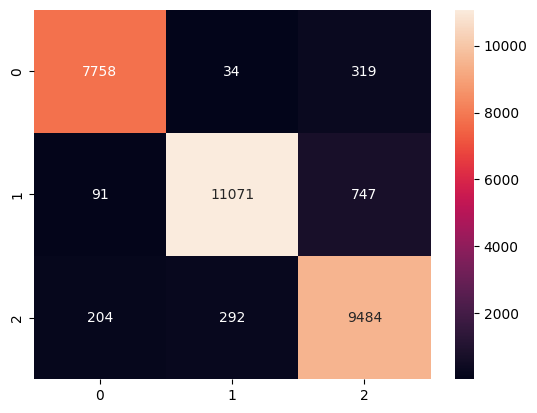

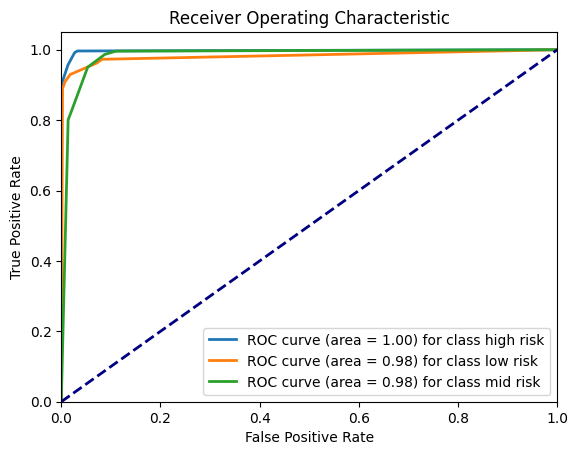

In [ ]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.feature_selection import SequentialFeatureSelector
import matplotlib.pyplot as plt


# Initialize the K-Nearest Neighbors classifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

# Generate classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.show()

# Generate ROC curve
y_test_bin = label_binarize(y_test, classes=knn.classes_)
y_prob = knn.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_test_bin.shape[1]
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve (area = %0.2f) for class %s' % (roc_auc[i], knn.classes_[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

Classification Report:
               precision    recall  f1-score   support

   high risk       0.95      0.95      0.95      8111
    low risk       0.94      0.91      0.93     11909
    mid risk       0.88      0.91      0.89      9980

    accuracy                           0.92     30000
   macro avg       0.92      0.92      0.92     30000
weighted avg       0.92      0.92      0.92     30000

Confusion Matrix:
 [[ 7672    58   381]
 [  129 10881   899]
 [  259   659  9062]]


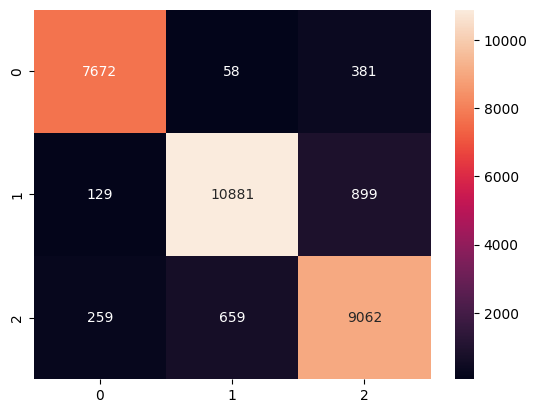

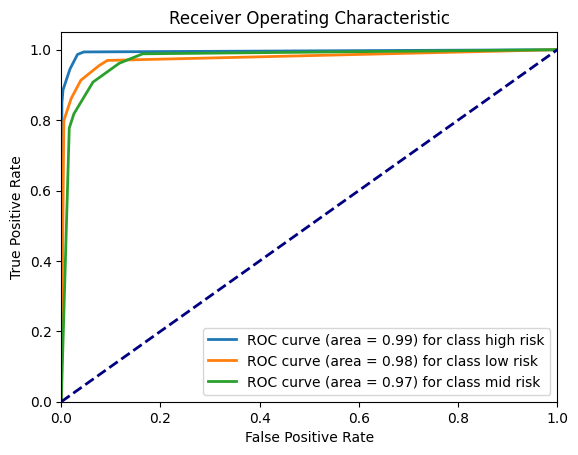

In [ ]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.feature_selection import SequentialFeatureSelector
import matplotlib.pyplot as plt


# Initialize the K-Nearest Neighbors classifier
knn = KNeighborsClassifier()

# Apply Forward Feature Selection
ffs = SequentialFeatureSelector(knn, n_features_to_select='auto', direction='forward', scoring='accuracy', cv=5)
ffs.fit(X_train, y_train)

# Transform the datasets to only include selected features
X_train_ffs = ffs.transform(X_train)
X_test_ffs = ffs.transform(X_test)

# Train the K-Nearest Neighbors classifier on the selected features
knn.fit(X_train_ffs, y_train)
y_pred = knn.predict(X_test_ffs)

# Generate classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.show()

# Generate ROC curve
y_test_bin = label_binarize(y_test, classes=knn.classes_)
y_prob = knn.predict_proba(X_test_ffs)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_test_bin.shape[1]
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve (area = %0.2f) for class %s' % (roc_auc[i], knn.classes_[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [ ]:
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import label_binarize
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc



# Initialize the K-Nearest Neighbors classifier
knn = KNeighborsClassifier()

# Apply RFECV to select important features
rfecv = RFECV(estimator=knn, step=1, cv=5, scoring='accuracy')
rfecv.fit(X_train_scaled, y_train)

y_pred = rfecv.predict(X_test_scaled)

# Selected features
print(f"Optimal number of features: {rfecv.n_features_}")
print(f"Ranking of features: {rfecv.ranking_}")

# Generate classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.show()

y_test_bin = label_binarize(y_test, classes=rfecv.classes_)
y_prob = rfecv.predict_proba(X_test_scaled)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_test_bin.shape[1]
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve (area = %0.2f) for class %s' % (roc_auc[i], rfecv.classes_[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

ValueError: when `importance_getter=='auto'`, the underlying estimator KNeighborsClassifier should have `coef_` or `feature_importances_` attribute. Either pass a fitted estimator to feature selector or call fit before calling transform.

**GaussianNB**

Classification Report:
               precision    recall  f1-score   support

   high risk       0.80      0.63      0.71      8111
    low risk       0.58      0.90      0.71     11909
    mid risk       0.46      0.25      0.32      9980

    accuracy                           0.61     30000
   macro avg       0.62      0.59      0.58     30000
weighted avg       0.60      0.61      0.58     30000

Confusion Matrix:
 [[ 5106  1107  1898]
 [  211 10673  1025]
 [ 1037  6480  2463]]


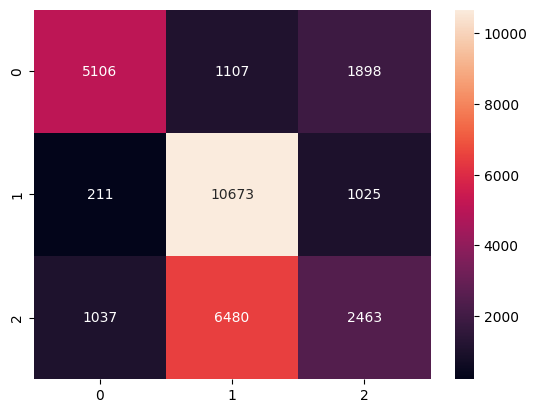

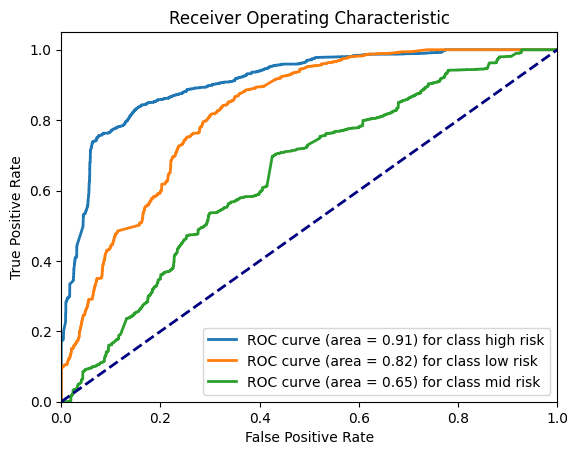

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.feature_selection import SequentialFeatureSelector

# Initialize the Naive Bayes classifier
nb = GaussianNB()
nb.fit(X_train, y_train)

y_pred = nb.predict(X_test)

# Generate classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.show()

# Generate ROC curve
y_test_bin = label_binarize(y_test, classes=nb.classes_)
y_prob = nb.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_test_bin.shape[1]
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve (area = %0.2f) for class %s' % (roc_auc[i], nb.classes_[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

Classification Report:
               precision    recall  f1-score   support

   high risk       0.80      0.58      0.67      8111
    low risk       0.57      0.91      0.70     11909
    mid risk       0.44      0.22      0.30      9980

    accuracy                           0.59     30000
   macro avg       0.60      0.57      0.56     30000
weighted avg       0.59      0.59      0.56     30000

Confusion Matrix:
 [[ 4719  1477  1915]
 [  160 10791   958]
 [ 1022  6725  2233]]


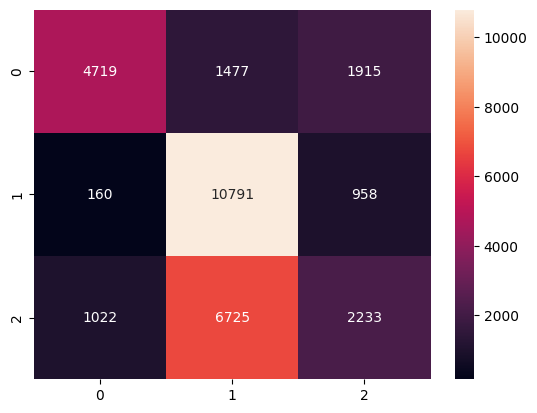

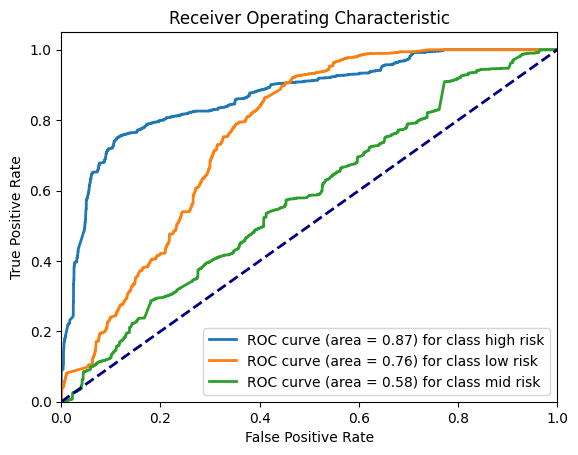

In [ ]:

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.feature_selection import SequentialFeatureSelector

# Initialize the Naive Bayes classifier
nb = GaussianNB()

# Apply Forward Feature Selection
ffs = SequentialFeatureSelector(nb, n_features_to_select='auto', direction='forward', scoring='accuracy', cv=5)
ffs.fit(X_train, y_train)

# Transform the datasets to only include selected features
X_train_ffs = ffs.transform(X_train)
X_test_ffs = ffs.transform(X_test)

# Train the Naive Bayes classifier on the selected features
nb.fit(X_train_ffs, y_train)
y_pred = nb.predict(X_test_ffs)

# Generate classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.show()

# Generate ROC curve
y_test_bin = label_binarize(y_test, classes=nb.classes_)
y_prob = nb.predict_proba(X_test_ffs)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_test_bin.shape[1]
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve (area = %0.2f) for class %s' % (roc_auc[i], nb.classes_[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import label_binarize
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc


# Initialize the Naive Bayes classifier
nb = GaussianNB()

# Apply RFECV to select important features
rfecv = RFECV(estimator=nb, step=1, cv=5, scoring='accuracy')
rfecv.fit(X_train_scaled, y_train)

y_pred = rfecv.predict(X_test_scaled)

# Selected features
print(f"Optimal number of features: {rfecv.n_features_}")
print(f"Ranking of features: {rfecv.ranking_}")

# Generate classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.show()

y_test_bin = label_binarize(y_test, classes=rfecv.classes_)
y_prob = rfecv.predict_proba(X_test_scaled)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_test_bin.shape[1]
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve (area = %0.2f) for class %s' % (roc_auc[i], rfecv.classes_[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()